Install and load packages

In [ ]:
install.packages('readxl')
install.packages('dplyr')
install.packages('ggplot2')
install.packages('stargazer')
install.packages('purrr')
install.packages('stringr')
install.packages('lessR')
install.packages('fixest')
install.packages('ordinal')
install.packages('effsize')


In [1]:
library(readxl)
library(dplyr)
library(ggplot2)
library(stats)
library(stargazer)
library(purrr)
library(stringr)
library(tidyverse)
library(lessR)
library(fixest)
library(sandwich)
library(lmtest)
library(car)
library(effsize)


Warning message in sprintf(gettext(fmt, domain = domain), ...):
"un argument est inutilis'e par le format '? avec la version R %s'"
Warning message:
"? avec la version R 'dplyr'"

Attachement du package : 'dplyr'


Les objets suivants sont masqu'es depuis 'package:stats':

    filter, lag


Les objets suivants sont masqu'es depuis 'package:base':

    intersect, setdiff, setequal, union


Warning message in sprintf(gettext(fmt, domain = domain), ...):
"un argument est inutilis'e par le format '? avec la version R %s'"
Warning message:
"? avec la version R 'ggplot2'"
Warning message in sprintf(gettext(fmt, domain = domain), ...):
"un argument est inutilis'e par le format '? avec la version R %s'"
Warning message:
"? avec la version R 'stargazer'"

Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 


Warning message in sprintf(gettext(fmt, domain = domain), 

Load df

In [ ]:
# create a list of file names and corresponding is_editorial values
file_names <- c("df_rap_final_2.xlsx", "df_pop_final_2.xlsx", "df_variete_final_2.xlsx", "df_ete_final_2.xlsx",
                "df_latino_final_2.xlsx", "df_ambiance_final_2.xlsx", "df_electro_final_2.xlsx", "df_rock_final_2.xlsx",
                "df_indie_final_2.xlsx", "df_sport_final_2.xlsx", "df_rnb_final_2.xlsx", "df_afro_final_2.xlsx",
                "df_kpop_final_2.xlsx", "df_detente_final_2.xlsx", "df_dormir_final_2.xlsx", "df_soiree_final_2.xlsx",
                "df_zouk_final_2.xlsx", "df_reggae_final_2.xlsx", "df_maison_final_2.xlsx", "df_decennies_final_2.xlsx",
                "df_alternatif_final_2.xlsx", "df_amour_final_2.xlsx", "df_metal_final_2.xlsx", "df_jazz_final_2.xlsx",
                "df_tendances_final_2.xlsx", "df_equal_final_2.xlsx", "df_classique_final_2.xlsx", "df_folk_final_2.xlsx",
                "df_focus_final_2.xlsx", "df_soul_final_2.xlsx", "df_netflix_final_2.xlsx", "df_enfants_final_2.xlsx",
                "df_etudiants_final_2.xlsx", "df_bienetre_final_2.xlsx", "df_punk_final_2.xlsx", "df_ambient_final_2.xlsx",
                "df_country_final_2.xlsx", "df_blues_final_2.xlsx", "df_arabe_final_2.xlsx", "df_voyage_final_2.xlsx",
                "df_frequency_final_2.xlsx"
                )


type_values <- c('genre', 'genre', 'genre', 'mood', 'genre', 'mood', 'genre', 'genre', 'genre', 'mood', 'genre',
                 'genre', 'genre', 'mood', 'mood', 'mood', 'genre', 'genre', 'mood', 'trend', 'genre', 'mood',
                 'genre', 'genre', 'trend', 'trend', 'genre', 'genre', 'mood', 'genre', 'trend', 'mood', 'mood',
                 'mood', 'genre', 'genre', 'genre', 'genre', 'genre', 'mood', 'trend'
                 )

df_list <- list()
for (i in seq_along(file_names)) {
  file_name <- file_names[i]
  type <- type_values[i]
  df <- read_xlsx(file_name)
  df$type <- type
  df_list[[i]] <- df
}

df <- Reduce(function(x, y) merge(x, y, all = TRUE), df_list)


In [ ]:
writexl::write_xlsx(df, "df_final_2.xlsx")


Data management

In [2]:
df <- read_xlsx("df_final_2.xlsx")

df$type <- relevel(as.factor(df$type), ref = "genre")


Dist

In [3]:
# Scale values from 0 to 1
df$dist <- rescale(mean_distance, df, kind='z')

# Print scaled values
df$dist


[1] -0.643  0.499  2.287 -0.478 -0.407  0.617 -0.438  0.222 -0.682 -0.053
  [11]  0.234 -0.007 -1.124 -0.773 -0.933 -0.306 -1.754  1.349 -0.617 -0.160
  [21]  0.900 -0.762 -1.512 -0.542 -0.701 -0.818 -1.249 -0.662  0.892 -1.438
  [31] -0.053 -0.445 -0.643  0.390  0.234 -1.061 -0.003 -0.279 -0.078  1.308
  [41] -1.213 -0.512  0.661 -0.547 -0.672 -0.414  0.457 -0.409 -0.502 -1.764
  [51]  0.542  1.033  1.036  0.767 -0.239 -0.695 -1.889  1.219 -0.867 -0.215
  [61]  0.591  2.694 -1.527  0.027 -0.228  0.315 -0.398  0.363  0.824 -0.275
  [71]  0.990  0.759  0.120 -0.151 -0.756  0.029 -0.658 -0.520 -0.259 -0.535
  [81] -0.413 -1.090  0.306 -0.630 -0.149  0.077 -0.411  0.083  0.581  0.372
  [91]  0.704 -0.113  0.859  0.446 -0.696 -0.244  0.814 -1.302 -0.214 -1.236
 [101] -1.468 -1.399 -2.251 -1.318 -0.292 -2.162 -1.634  0.383 -0.917 -0.461
 [111]  0.188  1.144  0.529  0.301 -0.614 -0.932 -0.159  0.092  0.224 -0.617
 [121]  0.282  0.029 -0.684 -0.839  0.855  0.123  0.404  0.637  0.657  2.072
 [131]  0.469 -1.272 -1.566 -0.493  1.070  0.061  0.007  0.099 -0.103 -0.910
 [141] -0.649  1.341 -0.791 -2.208  0.921 -0.111 -0.974 -0.560  0.479  0.122
 [151]  0.296  1.126  0.917  1.448  0.844  0.344 -1.177 -0.177 -1.036  0.266
 [161] -0.846  1.592  1.134  0.538 -0.573  0.242  1.044  1.305 -0.900  0.414
 [171]  0.250 -0.370  0.006 -0.784 -0.356  1.045  1.509 -0.379  0.558  0.283
 [181]  0.493 -0.766 -0.186 -0.731 -0.609  2.116 -0.687 -0.661  0.545  0.183
 [191]  1.062  0.331  0.265 -0.094  0.045  0.875  1.188  1.133 -0.047 -0.805
 [201] -0.145  0.172  0.737  0.330  0.084  0.485 -0.748  0.861 -0.057  0.218
 [211]  0.095 -0.998  0.639 -0.357 -0.656  3.138  0.233  1.125  1.732  1.056
 [221]  1.115  0.254 -2.292 -0.618  0.000 -0.733  0.303  0.366 -0.440 -0.942
 [231]  1.504  2.337  1.422 -0.634  0.823  0.835  0.593 -0.636 -0.712 -0.438
 [241] -0.144 -0.880 -0.451 -0.792 -0.256  0.093  0.158  0.205 -1.212 -0.821
 [251] -0.598  0.453 -1.980  0.004  0.876 -0.081  0.336  1.625 -0.151 -0.238
 [261]  0.040 -0.793 -0.199  0.244  1.246 -0.389  0.550 -0.126  0.384  0.006
 [271] -1.394 -1.006 -0.698  0.142  0.506 -0.120 -0.526 -0.370 -0.029 -1.501
 [281]  0.541 -0.066  0.457 -0.072 -0.098  0.142 -1.092  0.422  0.687 -1.317
 [291] -0.583  0.018  0.463 -2.066  0.411  0.552  0.600  0.120 -0.648 -0.299
 [301] -0.979 -0.776 -0.617  0.728  0.454  0.162 -1.248 -1.060 -0.722 -2.237
 [311] -1.530 -0.081  0.881  0.778  0.805 -0.146  0.224 -0.267 -1.202 -0.282
 [321]  0.000  0.395  0.725 -0.121 -0.147  0.475 -0.458 -1.020  0.519 -0.238
 [331] -0.758  0.291 -0.427 -0.491 -0.977 -1.296 -0.190 -0.316 -0.669 -1.573
 [341]  0.191 -0.203 -0.702 -0.334 -0.166  1.360 -0.036  0.546  1.362 -0.338
 [351] -1.363 -0.864 -0.804 -0.054  0.754 -0.394 -0.410 -2.382 -0.605 -1.153
 [361]  0.495  0.243 -0.595  0.968  0.317  1.283  0.940  0.601  0.489  0.795
 [371]  0.600  0.455  1.919  0.320  0.197  0.701  1.355 -0.834  0.424  0.257
 [381]  0.605 -0.566  0.028 -0.497  0.300  1.112  1.271  0.498 -0.589  0.044
 [391]  1.147  0.695 -0.724  0.272 -0.816 -1.982  2.873  0.835  0.309  0.698
 [401]  0.492 -1.990 -0.713 -0.029 -0.155  0.123  1.188  1.195  0.090 -0.550
 [411] -0.289  0.582 -1.036  0.479  1.517  0.027 -0.139 -0.346 -1.012 -1.190
 [421] -0.540 -0.795 -1.588 -0.918 -1.876 -0.734 -0.508  0.646  0.491 -0.018
 [431]  1.684  0.509  0.891  0.943  0.455 -0.046  0.695  1.159 -0.348  0.489
 [441]  0.858  0.631  0.534  0.523  0.172  0.914  0.702  1.323  0.967  1.311
 [451]  0.363 -0.316 -1.094 -1.067 -0.020  0.721 -0.957  0.267 -0.635 -2.578
 [461]  0.249 -0.485  0.855 -2.006 -0.231  1.746 -0.292 -0.211 -0.168 -0.528
 [471] -1.366  0.750  0.602 -0.473  0.442  0.029  0.768 -1.170 -1.428 -1.042
 [481] -2.332 -2.315  1.213 -0.552  0.970  0.854  0.082 -0.648  1.736 -1.086
 [491]  1.069  0.482  0.730  0.224  1.037  1.336  0.351  0.164  1.136 -0.257
 [501] -0.493 -0.579  0.402  1.138  0.384 -0.449 -0.901  2.447  0.253 -0.191
 [511] -0.415  0.379 -0.491  0.056  0.343  0.123  0.253 -0.586 -0.412 -0.396

Covariates

In [4]:
# Scale covariates and log followers
df$track_pop_norm <- rescale(as.numeric(track_pop), df, kind='0to1')
df$track_pop_norm

df$artist_pop_norm <- rescale(as.numeric(artist_pop), df, kind='0to1')
df$artist_pop_norm

df$nb_tracks_res <- rescale(as.numeric(nb_tracks), df, kind='z')
df$nb_tracks_norm <- rescale(nb_tracks_res, df, kind='0to1')
df$nb_tracks_norm


[1] 0.762 0.696 0.494 0.727 0.480 0.621 0.769 0.902 0.849 0.754 0.749 0.705
  [13] 0.678 0.929 0.742 0.745 0.774 0.779 0.563 0.527 0.540 0.394 0.483 0.542
  [25] 0.580 0.552 0.715 0.619 0.817 0.780 0.845 0.653 0.607 0.747 0.825 0.823
  [37] 0.866 0.857 0.769 0.450 0.699 0.750 0.812 0.712 0.782 0.832 0.814 0.837
  [49] 0.545 0.185 0.285 0.709 0.564 0.663 0.394 0.375 0.577 0.479 0.752 0.649
  [61] 0.612 0.395 0.714 0.806 0.735 0.437 0.769 0.383 0.694 0.773 0.562 0.326
  [73] 0.528 0.354 0.439 0.402 0.977 0.882 0.890 0.891 0.418 0.798 0.436 0.760
  [85] 0.492 0.801 0.864 0.575 0.599 0.751 0.801 0.476 0.440 0.585 0.498 0.630
  [97] 0.317 0.326 0.306 0.298 0.303 0.493 0.414 0.400 0.379 0.584 0.603 0.413
 [109] 0.454 0.452 0.773 0.811 0.745 0.373 0.485 0.796 0.963 0.758 0.764 0.779
 [121] 0.462 0.505 0.671 0.924 0.524 0.412 0.463 0.543 0.785 0.297 0.289 0.431
 [133] 0.350 0.540 0.515 0.321 0.705 0.582 0.482 0.475 0.626 0.493 0.658 0.687
 [145] 0.865 0.908 0.515 0.672 0.931 0.832 0.655 0.206 0.813 0.505 0.200 0.843
 [157] 0.862 0.821 0.477 0.688 0.711 0.548 0.199 0.564 0.131 0.313 0.273 0.678
 [169] 0.288 0.557 0.710 0.934 0.660 0.468 0.428 0.541 0.270 0.442 0.723 0.679
 [181] 0.341 0.281 0.641 0.690 0.352 0.453 0.389 0.458 0.608 0.316 0.314 0.337
 [193] 0.375 0.402 0.411 0.468 0.355 0.373 0.479 0.325 0.457 0.490 0.388 0.489
 [205] 0.881 0.534 0.512 0.590 0.524 0.398 0.781 0.594 0.592 0.412 0.882 0.361
 [217] 0.709 0.465 0.622 0.488 0.899 0.411 0.500 0.147 0.693 0.420 0.465 0.542
 [229] 0.475 0.696 0.212 0.285 0.197 0.656 0.548 0.424 0.725 0.560 0.454 0.544
 [241] 0.611 0.888 0.633 0.481 0.737 0.783 0.693 0.570 0.560 0.543 0.719 0.490
 [253] 0.592 0.582 0.585 0.461 0.661 0.324 0.371 0.546 0.371 0.456 0.950 0.755
 [265] 0.494 0.569 0.434 0.603 0.864 0.540 0.532 0.579 0.523 0.575 0.219 0.334
 [277] 0.596 0.580 0.561 0.681 0.589 0.446 0.875 0.565 0.549 0.798 0.391 0.471
 [289] 0.759 0.504 0.529 0.636 0.530 0.539 0.634 0.841 0.420 0.420 0.807 0.783
 [301] 0.810 0.649 0.749 0.623 0.422 0.345 0.476 0.621 0.542 0.453 0.565 0.586
 [313] 0.338 0.437 0.581 0.638 0.518 0.656 0.643 0.675 0.619 0.497 0.655 0.737
 [325] 0.569 0.844 0.711 0.845 0.651 0.666 0.697 0.657 0.662 0.692 0.690 0.656
 [337] 0.680 0.689 0.816 0.849 0.621 0.860 0.545 0.632 0.623 0.549 0.658 0.532
 [349] 0.616 0.624 0.370 0.598 0.502 0.703 0.947 0.500 0.520 0.582 0.548 0.546
 [361] 0.507 0.343 0.454 0.842 0.698 0.525 0.534 0.703 0.393 0.616 0.561 0.883
 [373] 0.621 0.572 0.452 0.595 0.528 0.588 0.679 0.341 0.757 0.580 0.752 0.533
 [385] 0.510 0.636 0.681 0.654 0.586 0.642 0.644 0.729 0.447 0.550 0.542 0.617
 [397] 0.175 0.411 0.748 0.353 0.581 0.565 0.757 0.704 0.750 0.736 0.519 0.650
 [409] 0.538 0.459 0.463 0.572 0.516 0.243 0.514 0.381 0.299 0.371 0.398 0.744
 [421] 0.843 0.718 0.899 0.805 0.498 0.639 0.477 0.589 0.417 0.439 0.230 0.342
 [433] 0.488 0.242 0.326 0.390 0.460 0.404 0.623 0.439 0.702 0.565 0.444 0.353
 [445] 0.334 0.362 0.441 0.456 0.305 0.720 0.612 0.873 0.813 0.603 0.290 0.478
 [457] 0.365 0.462 0.510 0.584 0.672 0.905 0.640 0.555 0.476 0.503 0.430 0.512
 [469] 0.559 0.747 0.729 0.795 0.819 0.507 0.534 0.827 0.853 0.659 0.468 0.464
 [481] 0.586 0.508 0.325 0.528 0.474 0.545 0.561 0.511 0.148 0.471 0.439 0.638
 [493] 0.280 0.294 0.611 0.634 0.573 0.286 0.249 0.265 0.369 0.531 0.630 0.504
 [505] 0.534 0.005 0.433 0.609 0.978 0.792 0.622 0.313 0.398 0.826 0.376 0.886
 [517] 0.522 0.468 0.441 0.490 0.425 0.817 0.699 0.893 0.934 0.502 0.541 0.450
 [529] 0.182 0.900 0.817 0.842 0.912 0.328 0.657 0.420 0.702 0.900 0.511 0.564
 [541] 0.830 0.782 0.865 0.701 0.912 0.406 0.716 0.598 0.647 0.332 0.467 0.453
 [553] 0.447 0.606 0.810 0.429 0.673 0.619 0.719 0.410 0.703 0.574 0.658 0.467
 [565] 0.620 0.693 0.386 0.407 0.508 0.786 0.779 0.728 0.533 0.519 0.603 0.813
 [577] 0.860 0.971 0.906 0.603 0.666 0.602 0.595 0.432 0.488 0.943 0.572 0.561
 [589] 0.843 0.757 0.533 0.527 0.584 0.619 0.755 0.875 0.817 0.776 0.765 0.632
 [601] 0.755 0.503 0.633 0.620 0.319 0.040 0.570 0.43

[1] 0.733 0.657 0.642 0.763 0.477 0.647 0.791 0.938 0.844 0.813 0.689 0.703
  [13] 0.749 0.962 0.791 0.778 0.817 0.813 0.625 0.504 0.588 0.389 0.387 0.587
  [25] 0.561 0.590 0.699 0.668 0.777 0.749 0.826 0.648 0.652 0.677 0.791 0.772
  [37] 0.831 0.780 0.687 0.515 0.695 0.664 0.788 0.759 0.726 0.760 0.754 0.806
  [49] 0.487 0.285 0.389 0.811 0.568 0.712 0.369 0.365 0.594 0.534 0.820 0.664
  [61] 0.811 0.387 0.760 0.790 0.702 0.374 0.753 0.324 0.714 0.760 0.902 0.329
  [73] 0.532 0.359 0.451 0.447 1.000 0.840 0.834 0.834 0.306 0.878 0.401 0.774
  [85] 0.493 0.782 0.877 0.542 0.573 0.733 0.763 0.505 0.373 0.623 0.520 0.549
  [97] 0.424 0.396 0.381 0.431 0.416 0.437 0.457 0.510 0.361 0.439 0.490 0.430
 [109] 0.524 0.591 0.855 0.848 0.772 0.302 0.592 0.810 0.963 0.700 0.757 0.731
 [121] 0.455 0.506 0.655 0.865 0.497 0.340 0.429 0.549 0.826 0.254 0.333 0.353
 [133] 0.315 0.575 0.631 0.282 0.727 0.594 0.412 0.310 0.485 0.462 0.704 0.710
 [145] 0.896 0.950 0.557 0.735 0.974 0.950 0.654 0.183 0.823 0.584 0.157 0.869
 [157] 0.904 0.922 0.440 0.658 0.739 0.718 0.219 0.725 0.117 0.487 0.674 0.692
 [169] 0.405 0.558 0.691 0.889 0.745 0.606 0.360 0.434 0.227 0.419 0.684 0.722
 [181] 0.333 0.197 0.621 0.743 0.395 0.529 0.371 0.496 0.555 0.294 0.286 0.312
 [193] 0.527 0.354 0.424 0.596 0.445 0.660 0.470 0.357 0.448 0.643 0.481 0.495
 [205] 0.835 0.501 0.386 0.682 0.550 0.426 0.747 0.462 0.694 0.454 0.892 0.325
 [217] 0.763 0.355 0.630 0.349 0.972 0.380 0.378 0.381 0.653 0.438 0.434 0.470
 [229] 0.366 0.740 0.270 0.223 0.419 0.662 0.579 0.321 0.778 0.589 0.421 0.618
 [241] 0.642 0.925 0.495 0.369 0.762 0.841 0.681 0.579 0.643 0.489 0.801 0.395
 [253] 0.467 0.611 0.616 0.409 0.543 0.325 0.351 0.594 0.450 0.508 0.962 0.777
 [265] 0.572 0.657 0.376 0.592 0.843 0.684 0.558 0.667 0.645 0.697 0.509 0.553
 [277] 0.710 0.662 0.698 0.613 0.728 0.510 0.888 0.686 0.493 0.813 0.432 0.465
 [289] 0.745 0.367 0.400 0.770 0.527 0.418 0.642 0.857 0.361 0.470 0.815 0.798
 [301] 0.827 0.727 0.771 0.711 0.332 0.309 0.554 0.500 0.470 0.419 0.654 0.662
 [313] 0.414 0.314 0.716 0.639 0.685 0.587 0.642 0.601 0.566 0.530 0.653 0.716
 [325] 0.626 0.787 0.734 0.877 0.843 0.835 0.807 0.802 0.798 0.816 0.830 0.857
 [337] 0.851 0.844 0.799 0.896 0.630 0.812 0.569 0.630 0.641 0.534 0.656 0.501
 [349] 0.618 0.708 0.305 0.480 0.406 0.760 0.983 0.519 0.561 0.441 0.550 0.502
 [361] 0.521 0.223 0.473 0.857 0.714 0.554 0.600 0.745 0.385 0.583 0.592 0.911
 [373] 0.600 0.576 0.492 0.696 0.504 0.627 0.730 0.349 0.758 0.580 0.703 0.691
 [385] 0.497 0.679 0.668 0.712 0.610 0.519 0.652 0.803 0.625 0.539 0.387 0.448
 [397] 0.287 0.631 0.708 0.422 0.731 0.551 0.822 0.778 0.812 0.811 0.560 0.622
 [409] 0.585 0.406 0.581 0.558 0.385 0.325 0.534 0.403 0.304 0.342 0.357 0.788
 [421] 0.849 0.778 0.951 0.813 0.419 0.622 0.479 0.529 0.456 0.418 0.192 0.247
 [433] 0.449 0.260 0.268 0.337 0.410 0.351 0.601 0.385 0.754 0.572 0.401 0.384
 [445] 0.327 0.378 0.456 0.345 0.203 0.691 0.564 0.894 0.802 0.620 0.332 0.417
 [457] 0.350 0.452 0.512 0.441 0.713 0.939 0.644 0.662 0.376 0.577 0.582 0.565
 [469] 0.680 0.732 0.691 0.781 0.828 0.528 0.522 0.792 0.856 0.477 0.374 0.386
 [481] 0.480 0.414 0.330 0.534 0.499 0.517 0.603 0.626 0.149 0.398 0.441 0.643
 [493] 0.226 0.194 0.618 0.618 0.535 0.179 0.118 0.149 0.248 0.588 0.645 0.595
 [505] 0.489 0.154 0.478 0.688 0.973 0.732 0.640 0.407 0.400 0.853 0.434 0.892
 [517] 0.500 0.651 0.363 0.437 0.446 0.873 0.692 0.895 0.938 0.609 0.501 0.428
 [529] 0.196 0.935 0.844 0.840 0.913 0.399 0.625 0.465 0.668 0.820 0.389 0.435
 [541] 0.769 0.909 0.889 0.812 0.929 0.424 0.773 0.644 0.669 0.351 0.310 0.531
 [553] 0.325 0.687 0.889 0.644 0.697 0.610 0.796 0.366 0.740 0.618 0.654 0.395
 [565] 0.582 0.673 0.330 0.384 0.458 0.804 0.855 0.773 0.584 0.573 0.857 0.816
 [577] 0.844 0.987 0.868 0.529 0.689 0.567 0.523 0.442 0.531 0.956 0.627 0.577
 [589] 0.782 0.688 0.383 0.491 0.609 0.635 0.781 0.942 0.801 0.738 0.780 0.702
 [601] 0.795 0.398 0.709 0.643 0.356 0.000 0.542 0.52

[1] 0.074 0.020 0.042 0.069 0.071 0.069 0.069 0.029 0.069 0.069 0.029 0.086
  [13] 0.049 0.029 0.069 0.090 0.151 0.009 0.069 0.051 0.029 0.045 0.078 0.049
  [25] 0.098 0.069 0.109 0.069 0.029 0.110 0.069 0.064 0.110 0.029 0.049 0.110
  [37] 0.053 0.053 0.049 0.020 0.110 0.045 0.029 0.069 0.110 0.069 0.029 0.069
  [49] 0.020 0.225 0.020 0.015 0.029 0.037 0.045 0.069 0.162 0.039 0.090 0.069
  [61] 0.029 0.004 0.110 0.029 0.029 0.020 0.037 0.029 0.029 0.045 0.051 0.029
  [73] 0.139 0.029 0.090 0.029 0.110 0.110 0.110 0.110 0.123 0.110 0.049 0.038
  [85] 0.090 0.053 0.053 0.053 0.057 0.053 0.053 0.053 0.037 0.049 0.110 0.029
  [97] 0.026 0.048 0.045 0.069 0.069 0.079 0.092 0.054 0.069 0.167 0.082 0.029
 [109] 0.069 0.110 0.069 0.029 0.029 0.045 0.033 0.069 0.069 0.037 0.045 0.053
 [121] 0.029 0.070 0.069 0.053 0.029 0.042 0.029 0.037 0.029 0.069 0.029 0.086
 [133] 0.131 0.069 0.022 0.053 0.069 0.045 0.029 0.096 0.078 0.055 0.069 0.069
 [145] 0.029 0.069 0.110 0.057 0.029 0.029 0.029 0.044 0.029 0.027 0.056 0.052
 [157] 0.151 0.050 0.053 0.069 0.069 0.007 0.021 0.057 0.069 0.105 0.056 0.020
 [169] 0.069 0.029 0.029 0.089 0.053 0.059 0.043 0.024 0.029 0.053 0.029 0.029
 [181] 0.069 0.029 0.053 0.069 0.069 0.012 0.094 0.118 0.045 0.073 0.029 0.051
 [193] 0.037 0.029 0.069 0.037 0.029 0.063 0.122 1.000 0.045 0.029 0.056 0.072
 [205] 0.045 0.110 0.045 0.049 0.069 0.029 0.029 0.082 0.064 0.049 0.069 0.016
 [217] 0.029 0.069 0.029 0.038 0.029 0.029 0.224 0.046 0.040 0.045 0.016 0.029
 [229] 0.072 0.108 0.007 0.001 0.018 0.049 0.015 0.029 0.020 0.069 0.079 0.069
 [241] 0.069 0.094 0.069 0.203 0.069 0.037 0.069 0.110 0.069 0.056 0.086 0.026
 [253] 0.337 0.118 0.029 0.153 0.069 0.035 0.052 0.033 0.072 0.069 0.110 0.069
 [265] 0.029 0.078 0.029 0.069 0.041 0.023 0.025 0.112 0.069 0.029 0.038 0.063
 [277] 0.038 0.040 0.029 0.043 0.025 0.053 0.049 0.067 0.037 0.069 0.109 0.020
 [289] 0.049 0.110 0.093 0.068 0.019 0.192 0.029 0.029 0.020 0.074 0.065 0.057
 [301] 0.069 0.087 0.069 0.024 0.020 0.028 0.069 0.082 0.062 0.151 0.069 0.037
 [313] 0.037 0.015 0.029 0.069 0.043 0.090 0.069 0.090 0.029 0.043 0.029 0.061
 [325] 0.086 0.049 0.069 0.069 0.029 0.046 0.040 0.036 0.054 0.068 0.069 0.058
 [337] 0.063 0.063 0.110 0.110 0.057 0.029 0.060 0.069 0.049 0.020 0.053 0.053
 [349] 0.053 0.035 0.086 0.132 0.069 0.037 0.029 0.090 0.087 0.200 0.053 0.151
 [361] 0.029 0.025 0.053 0.029 0.029 0.020 0.029 0.029 0.024 0.029 0.036 0.029
 [373] 0.029 0.069 0.029 0.029 0.020 0.066 0.020 0.029 0.069 0.069 0.029 0.039
 [385] 0.074 0.049 0.033 0.029 0.049 0.026 0.029 0.029 0.043 0.055 0.073 0.126
 [397] 0.002 0.029 0.049 0.069 0.029 0.110 0.069 0.029 0.069 0.069 0.037 0.029
 [409] 0.040 0.087 0.069 0.045 0.115 0.151 0.069 0.277 0.069 0.164 0.057 0.110
 [421] 0.069 0.069 0.110 0.069 0.086 0.053 0.053 0.029 0.053 0.029 0.029 0.029
 [433] 0.029 0.025 0.029 0.045 0.029 0.028 0.054 0.029 0.020 0.029 0.029 0.029
 [445] 0.029 0.029 0.029 0.028 0.029 0.024 0.029 0.110 0.171 0.081 0.069 0.029
 [457] 0.069 0.069 0.086 0.156 0.078 0.029 0.029 0.180 0.177 0.026 0.076 0.069
 [469] 0.033 0.110 0.110 0.029 0.053 0.065 0.029 0.037 0.029 0.109 0.074 0.325
 [481] 0.314 0.243 0.027 0.090 0.069 0.029 0.069 0.082 0.053 0.069 0.048 0.049
 [493] 0.069 0.029 0.029 0.029 0.029 0.037 0.029 0.069 0.078 0.110 0.029 0.029
 [505] 0.029 0.058 0.099 0.005 0.029 0.053 0.053 0.043 0.046 0.037 0.074 0.029
 [517] 0.029 0.043 0.058 0.113 0.094 0.069 0.053 0.020 0.053 0.016 0.069 0.044
 [529] 0.045 0.049 0.029 0.057 0.069 0.069 0.029 0.069 0.037 0.110 0.112 0.140
 [541] 0.029 0.020 0.029 0.053 0.110 0.070 0.029 0.151 0.045 0.069 0.033 0.045
 [553] 0.073 0.148 0.069 0.069 0.014 0.017 0.078 0.030 0.110 0.053 0.037 0.012
 [565] 0.010 0.011 0.013 0.011 0.012 0.049 0.061 0.110 0.009 0.075 0.029 0.069
 [577] 0.037 0.069 0.029 0.029 0.037 0.029 0.029 0.020 0.069 0.110 0.024 0.029
 [589] 0.029 0.029 0.094 0.037 0.029 0.049 0.069 0.069 0.069 0.049 0.029 0.038
 [601] 0.029 0.123 0.055 0.069 0.151 0.029 0.029 0.02

In [5]:
summary(df$playlist_followers)
df$followers_class <- case_when(df$playlist_followers < 44010 ~ "low",
                                df$playlist_followers >= 44010 & df$playlist_followers < 173911 ~ "mid_low",
                                df$playlist_followers >= 173911 & df$playlist_followers < 561786 ~ "mid_high",
                                df$playlist_followers >= 561786 ~ "high")
table(df$followers_class)


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0    44010   173911   605830   561786 15373365 


    high      low mid_high  mid_low 
     309      308      308      308 

Descriptive stats

In [6]:
nrow(df)
sum(df$nb_tracks)


[1] 1233

[1] 116063

In [7]:
summary(df$mean_distance)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5946  0.8564  0.9175  0.9147  0.9714  1.3480 

In [8]:
table(df$type)



genre  mood trend 
  611   491   131 

In [9]:
tapply(df$mean_distance, df$type, mean)


genre      mood     trend 
0.9190346 0.8871645 0.9978605

In [ ]:
sapply(df[, c('nb_tracks', 'playlist_followers', 'track_pop', 'artist_pop')], function(x) c(summary(x), sd(x)))


Barplots

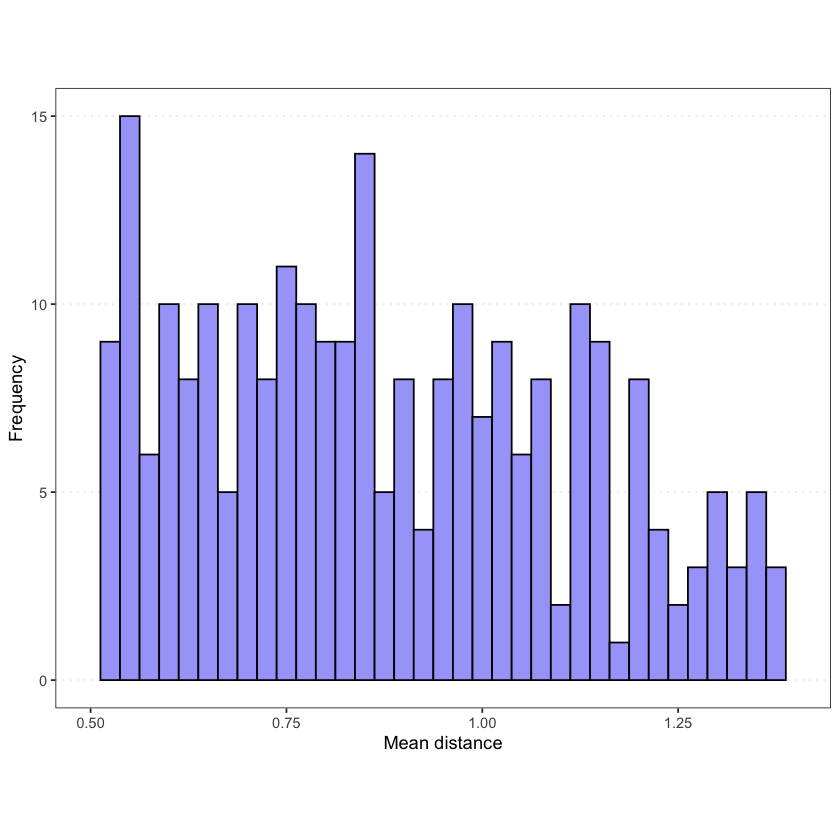

In [10]:
ggplot(df, aes(x = dist)) + 
  geom_histogram(binwidth = 0.025, color = "black", fill = "#a7a7f9") +
  xlim(0.5, 1.4) +
  theme_bw() +
  theme(panel.grid.major.y = element_line(linetype = "dotted"),
        panel.grid.minor.y = element_blank(),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        aspect.ratio = 0.8) +
  labs(x = 'Mean distance', y = 'Frequency')


OLS models

Robusts OLS

In [11]:
# Fit your robust linear regression 
lm_1 <- lm(dist ~ followers_class + nb_tracks + track_pop + type, data = df)
lm_1_1 <- lm(dist ~ type, data = df)
summary(lm_1)

lm1_robust_clustered <- coeftest(lm_1, vcov = vcovCL, type = "HC1", df = 2, cluster = ~type)
lm1_1_robust_clustered <- coeftest(lm_1_1, vcov = vcovCL, type = "HC1", df = 2, cluster = ~type)
print(lm1_robust_clustered)



Call:
lm(formula = dist ~ followers_class + nb_tracks + track_pop + 
    type, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8223 -0.4894 -0.0175  0.4548  7.1862 

Coefficients:
                          Estimate Std. Error t value             Pr(>|t|)    
(Intercept)              0.9069450  0.1254644   7.229    0.000000000000856 ***
followers_classlow       0.2549427  0.0783442   3.254              0.00117 ** 
followers_classmid_high -0.0197560  0.0646558  -0.306              0.75999    
followers_classmid_low   0.0452395  0.0688021   0.658              0.51096    
nb_tracks               -0.0069609  0.0003201 -21.745 < 0.0000000000000002 ***
track_pop               -0.0063120  0.0016862  -3.743              0.00019 ***
typemood                -0.1261455  0.0483778  -2.608              0.00923 ** 
typetrend                0.4964013  0.0776392   6.394    0.000000000229762 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard err


t test of coefficients:

                           Estimate  Std. Error t value Pr(>|t|)   
(Intercept)              0.90694499  0.35601213  2.5475 0.125687   
followers_classlow       0.25494271  0.10199562  2.4995 0.129650   
followers_classmid_high -0.01975595  0.04543856 -0.4348 0.706136   
followers_classmid_low   0.04523951  0.07302643  0.6195 0.598759   
nb_tracks               -0.00696085  0.00092701 -7.5089 0.017277 * 
track_pop               -0.00631200  0.00446339 -1.4142 0.292904   
typemood                -0.12614550  0.04153627 -3.0370 0.093468 . 
typetrend                0.49640128  0.01821963 27.2454 0.001344 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [18]:
stargazer(lm_1_1, lm_1)



% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Wed, Feb 28, 2024 - 15:26:48
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{2}{c}{\textit{Dependent variable:}} \\ 
\cline{2-3} 
\\[-1.8ex] & \multicolumn{2}{c}{dist} \\ 
\\[-1.8ex] & (1) & (2)\\ 
\hline \\[-1.8ex] 
 followers\_classlow &  & 0.255$^{***}$ \\ 
  &  & (0.078) \\ 
  & & \\ 
 followers\_classmid\_high &  & $-$0.020 \\ 
  &  & (0.065) \\ 
  & & \\ 
 followers\_classmid\_low &  & 0.045 \\ 
  &  & (0.069) \\ 
  & & \\ 
 nb\_tracks &  & $-$0.007$^{***}$ \\ 
  &  & (0.0003) \\ 
  & & \\ 
 track\_pop &  & $-$0.006$^{***}$ \\ 
  &  & (0.002) \\ 
  & & \\ 
 typemood & $-$0.325$^{***}$ & $-$0.126$^{***}$ \\ 
  & (0.057) & (0.048) \\ 
  & & \\ 
 typetrend & 0.804$^{***}$ & 0.496$^{***}$ \\ 
  & (0.091) & (0.078) \\ 
  & & \\ 
 Constant & 0.044 & 0.9

Control for clusters

In [ ]:
# Perform OLS
lm_1_2 <- lm(diversity_norm ~ followers_class + nb_tracks + track_pop + type + as.numeric(nb_clusters), data = df)
lm1_2_robust_clustered <- coeftest(lm_1_2, vcov = vcovCL, type = "HC1", df = 2, cluster = ~type)
summary(lm_1_2)

# Perform OLS
lm_2_2 <- lm(diversity_norm_2 ~ followers_class + nb_tracks + track_pop + type + as.numeric(nb_clusters_2), data = df)
lm2_2_robust_clustered <- coeftest(lm_2_2, vcov = vcovCL, type = "HC1", df = 2, cluster = ~type)
summary(lm_2_2)

stargazer(lm1_1_robust_clustered, lm1_robust_clustered, lm1_2_robust_clustered, lm2_1_robust_clustered, lm2_robust_clustered, lm2_2_robust_clustered)


In [ ]:
stargazer(lm_1_1, lm_1, lm_1_2, lm_2_1, lm_2, lm_2_2)


Multicolinearity

In [ ]:
vif(lm_1)


Test on silhouette scores

In [ ]:
# create a list of file names and corresponding is_editorial values
file_names <- c("robust_afro.xlsx", "robust_alternatif.xlsx", "robust_ambiance.xlsx", "robust_ambient.xlsx",
                "robust_amour.xlsx", "robust_arabe.xlsx", "robust_bienetre.xlsx", "robust_blues.xlsx",
                "robust_classique.xlsx", "robust_country.xlsx", "robust_decennies.xlsx", "robust_detente.xlsx",
                "robust_dormir.xlsx", "robust_electro.xlsx", "robust_enfants.xlsx", "robust_equal.xlsx",
                "robust_ete.xlsx", "robust_etudiants.xlsx"
                )

df_list <- list()
for (i in seq_along(file_names)) {
  file_name <- file_names[i]
  df <- read_xlsx(file_name)
  df_list[[i]] <- df
}

df_robust <- Reduce(function(x, y) merge(x, y, all = TRUE), df_list)


In [ ]:
# Perform paired t-tests
t_test_5_6 <- t.test(df_robust$silhouette_score_5, df_robust$silhouette_score_6, paired = TRUE)
cohen_d_5_6 <- cohen.d(df_robust$silhouette_score_5, df_robust$silhouette_score_6, hedges.correction = TRUE)
t_test_5_6
cohen_d_5_6

t_test_5_4 <- t.test(df_robust$silhouette_score_5, df_robust$silhouette_score_4, paired = TRUE)
cohen_d_5_4 <- cohen.d(df_robust$silhouette_score_5, df_robust$silhouette_score_4, hedges.correction = TRUE)
t_test_5_4
cohen_d_5_4

t_test_5_6_2 <- t.test(df_robust$silhouette_score_5_2, df_robust$silhouette_score_6_2, paired = TRUE)
cohen_d_5_6_2 <- cohen.d(df_robust$silhouette_score_5_2, df_robust$silhouette_score_6_2, hedges.correction = TRUE)
t_test_5_6_2
cohen_d_5_6_2

t_test_5_4_2 <- t.test(df_robust$silhouette_score_5_2, df_robust$silhouette_score_4_2, paired = TRUE)
cohen_d_5_4_2 <- cohen.d(df_robust$silhouette_score_5_2, df_robust$silhouette_score_4_2, hedges.correction = TRUE)
t_test_5_4_2
cohen_d_5_4_2
